# Homework with McDonald's sentiment data

## Imaginary problem statement

McDonald's receives **thousands of customer comments** on their website per day, and many of them are negative. Their corporate employees don't have time to read every single comment, but they do want to read a subset of comments that they are most interested in. In particular, the media has recently portrayed their employees as being rude, and so they want to review any comments about **rude service** so that they can update their employee training accordingly.

McDonald's has hired you to develop a system that ranks each comment by the **likelihood that it is referring to rude service**. They will use your system to build a "rudeness dashboard" for their corporate employees, so that employees can spend a few minutes each day examining the **most relevant recent comments**.

## Description of the data

Before hiring you, McDonald's used the [CrowdFlower platform](http://www.crowdflower.com/data-for-everyone) to pay humans to **hand-annotate** about 1500 comments with the **type of complaint**. The complaint types are listed below, with the encoding used in the data listed in parentheses:

- Bad Food (BadFood)
- Bad Neighborhood (ScaryMcDs)
- Cost (Cost)
- Dirty Location (Filthy)
- Missing Item (MissingFood)
- Problem with Order (OrderProblem)
- Rude Service (RudeService)
- Slow Service (SlowService)
- None of the above (na)

## Task 1

Read **`mcdonalds.csv`** into a pandas DataFrame and examine it. (It can be found in the **`data`** directory of the course repository.)

- The **policies_violated** column lists the type of complaint. If there is more than one type, the types are separated by newline characters.
- The **policies_violated:confidence** column lists CrowdFlower's confidence in the judgments of its human annotators for that row (higher is better).
- The **city** column is the McDonald's location.
- The **review** column is the actual text comment.

In [1]:
# use print only as a function
from __future__ import print_function

In [2]:
import pandas as pd

# alternative: read file into Pandas using a relative path
path = '../data/mcdonalds.csv'
mcd_raw = pd.read_csv(path)
mcd_raw.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN


## Task 2

Remove any rows from the DataFrame in which the **policies_violated** column has a **null value**. Check the shape of the DataFrame before and after to confirm that you only removed about 50 rows.

- **Note:** Null values are also known as "missing values", and are encoded in pandas with the special value "NaN". This is distinct from the "na" encoding used by CrowdFlower to denote "None of the above". Rows that contain "na" should **not** be removed.
- **Hint:** This [code snippet](http://chrisalbon.com/python/pandas_missing_data.html) shows different ways for handling missing data in pandas, and includes one strategy that will work for this task.

In [3]:
print("Shape before", mcd_raw.shape)
mcd = mcd_raw.dropna(subset = ['policies_violated'])
print("Shape after", mcd.shape)

Shape before (1525, 11)
Shape after (1471, 11)


## Task 3

Add a new column to the DataFrame called **"rude"** that is 1 if the **policies_violated** column contains the text "RudeService", and 0 if the **policies_violated** column does not contain "RudeService". The "rude" column is going to be your response variable, so check how many zeros and ones it contains.

- **Hint:** This [code snippet](http://chrisalbon.com/python/pandas_string_munging.html) shows how to use a pandas string method to search for the presence of a sub-string. You will also have to figure out how to convert the boolean results (True/False) to integers (1/0).

In [4]:
rude_col = mcd['policies_violated'].str.contains('RudeService')
rude_col = rude_col.astype(int)
mcd.insert(len(mcd.columns), "rude", rude_col)
mcd.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN,0
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...,NaN,0
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",NaN,1


In [5]:
mcd.rude.value_counts(sort=True)

0    968
1    503
Name: rude, dtype: int64

## Task 4

1. Define X (the **review** column) and y (the **rude** column).
2. Split X and y into training and testing sets (using the parameter **`random_state=1`**).
3. Use CountVectorizer (with the **default parameters**) to create document-term matrices from X_train and X_test.

In [6]:
X = mcd.review
y = mcd.rude

In [7]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(1103,)
(368,)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(1103, 7300) (368, 7300)


## Task 5

Fit a Multinomial Naive Bayes model to the training set, calculate the **predicted probabilites** (not the class predictions) for the testing set, and then calculate the **AUC**. Repeat this task using a logistic regression model to see which of the two models achieves a better AUC.

- **Note:** Because McDonald's only cares about ranking the comments by the likelihood that they refer to rude service, **classification accuracy** is not the relevant evaluation metric. **Area Under the Curve (AUC)** is a more useful evaluation metric for this scenario, since it measures the ability of the classifier to assign higher predicted probabilities to positive instances than to negative instances.
- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to calculate predicted probabilities and AUC, and my [blog post and video](http://www.dataschool.io/roc-curves-and-auc-explained/) explain AUC in-depth.

MultinomialNB AUC 0.841964711493


0.84196471149260854

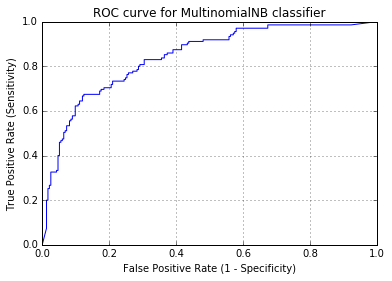

In [9]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt

def fit_predict_auc(model, X_train_dtm, y_train, X_test_dtm, y_test, plot=False, verbose=True):
    model.fit(X_train_dtm, y_train)
    y_pred_proba = model.predict_proba(X_test_dtm)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])
    if plot:
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for %s classifier'%model.__class__.__name__)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
    
    auc = metrics.auc(fpr, tpr)
    
    if verbose:
        print(model.__class__.__name__, "AUC", auc)
    return auc
    
fit_predict_auc(MultinomialNB(), X_train_dtm, y_train, X_test_dtm, y_test, plot=True)

LogisticRegression AUC 0.823398505802


0.82339850580193941

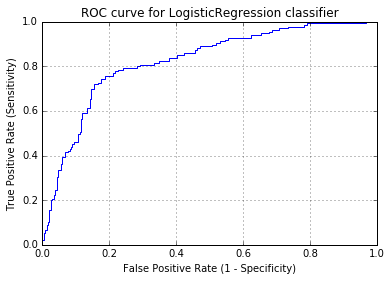

In [10]:
fit_predict_auc(LogisticRegression(), X_train_dtm, y_train, X_test_dtm, y_test, plot=True)

## Task 6

Using either Naive Bayes or logistic regression (whichever one had a better AUC in the previous step), try **tuning CountVectorizer** using some of the techniques we learned in class. Check the testing set **AUC** after each change, and find the set of parameters that increases AUC the most.

- **Hint:** It is highly recommended that you adapt the **`tokenize_test()`** function from class for this purpose, since it will allow you to iterate quickly through different sets of parameters.

MultinomialNB AUC: 0.8420 Features:  7300 params: {}
MultinomialNB AUC: 0.8497 Features:  7246 params: {'max_df': 0.2}
MultinomialNB AUC: 0.8523 Features:  7269 params: {'max_df': 0.3}
MultinomialNB AUC: 0.8475 Features:  7284 params: {'max_df': 0.4}
MultinomialNB AUC: 0.8448 Features:  7291 params: {'max_df': 0.5}
MultinomialNB AUC: 0.8468 Features:  7295 params: {'max_df': 0.6}
MultinomialNB AUC: 0.8442 Features:  3500 params: {'min_df': 2}
MultinomialNB AUC: 0.8430 Features:  2449 params: {'min_df': 3}
MultinomialNB AUC: 0.8425 Features:  1977 params: {'min_df': 4}
MultinomialNB AUC: 0.8545 Features:  3241 params: {'stop_words': 'english', 'min_df': 2}
MultinomialNB AUC: 0.8536 Features:  2202 params: {'stop_words': 'english', 'min_df': 3}
MultinomialNB AUC: 0.8574 Features:  1736 params: {'stop_words': 'english', 'min_df': 4}
MultinomialNB AUC: 0.8551 Features:  3469 params: {'max_df': 0.3, 'min_df': 2}
MultinomialNB AUC: 0.8514 Features:  2418 params: {'max_df': 0.3, 'min_df': 3}


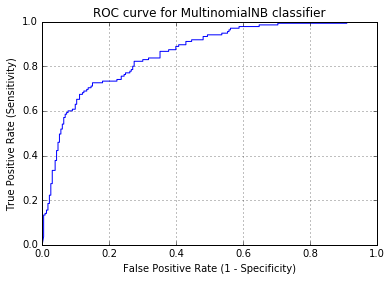

In [11]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect, mdl_class=MultinomialNB, **kwargs):
    
    if "plot" in kwargs:
        plot = kwargs["plot"]
        del kwargs["plot"]
    else:
        plot = False
    
    vect = vect(**kwargs)
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
       
    mdl = mdl_class()
    auc = fit_predict_auc(mdl, X_train_dtm, y_train, X_test_dtm, y_test, verbose = False, plot = plot)
    print(mdl.__class__.__name__,
          "AUC:", "%.4f"%auc,
          'Features:', ("%d"%X_train_dtm.shape[1]).rjust(5),
          "params:", kwargs)
    return auc

def set_best_vect(best_dict, vectorizer, **kwargs):
    auc = tokenize_test(CountVectorizer, **kwargs)
    if auc > best_dict['best_auc']:
        best_dict['best_auc'] = auc
        best_dict['best_vect'] = (vectorizer, kwargs)

def evaluate_vectorizers():
    best_dict = {'best_vect': None, 'best_auc': 0}
    for mdl_class in [MultinomialNB, LogisticRegression]:
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, max_df=0.2)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, max_df=0.3)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, max_df=0.4)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, max_df=0.5)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, max_df=0.6)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=2)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=3)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=4)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=2, stop_words='english')
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=3, stop_words='english')
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=4, stop_words='english')
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=2, max_df=0.3)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=3, max_df=0.3)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=4, max_df=0.3)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=5, max_df=0.3)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=3, max_df=0.35)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=3, max_df=0.45)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=3, max_df=0.55)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, min_df=3, max_df=0.65)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, ngram_range=(1, 2))
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, ngram_range=(1, 2), min_df=2, max_df=0.3)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, ngram_range=(1, 2), min_df=3, max_df=0.3)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class, ngram_range=(1, 2), min_df=5, max_df=0.4)
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class,
                      ngram_range=(1, 2), min_df=2, stop_words='english')
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class,
                      ngram_range=(1, 2), min_df=3, stop_words='english')
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class,
                      ngram_range=(1, 2), min_df=4, stop_words='english')
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class,
                      ngram_range=(1, 2), min_df=2, max_df=0.3, stop_words='english')
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class,
                      ngram_range=(1, 2), min_df=3, max_df=0.4, stop_words='english')
        set_best_vect(best_dict, CountVectorizer, mdl_class = mdl_class,
                      ngram_range=(1, 2), min_df=4, max_df=0.4, stop_words='english')

    print()
    print("Best vectorizer:")
    tokenize_test(best_dict['best_vect'][0], plot=True, **best_dict['best_vect'][1])
evaluate_vectorizers()

###### Task 7 (Challenge)

The **city** column might be predictive of the response, but we are not currently using it as a feature. Let's see whether we can increase the AUC by adding it to the model:

1. Create a new DataFrame column, **review_city**, that concatenates the **review** text with the **city** text. One easy way to combine string columns in pandas is by using the [`Series.str.cat()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.cat.html) method. Make sure to use the **space character** as a separator, as well as replacing **null city values** with a reasonable string value (such as 'na').
2. Redefine X as the **review_city** column, and re-split X and y into training and testing sets.
3. When you run **`tokenize_test()`**, CountVectorizer will simply treat the city as an extra word in the review, and thus it will automatically be included in the model! Check to see whether it increased or decreased the AUC of your **best model**.

In [12]:
X_new = X.str.cat(mcd.city, sep=" ", na_rep='na')
mcd.insert(len(mcd.columns), "review_city", X_new)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(mcd.review_city, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(1103,)
(368,)


MultinomialNB AUC: 0.8426 Features:  7303 params: {}
MultinomialNB AUC: 0.8499 Features:  7247 params: {'max_df': 0.2}
MultinomialNB AUC: 0.8510 Features:  7272 params: {'max_df': 0.3}
MultinomialNB AUC: 0.8480 Features:  7287 params: {'max_df': 0.4}
MultinomialNB AUC: 0.8444 Features:  7294 params: {'max_df': 0.5}
MultinomialNB AUC: 0.8463 Features:  7298 params: {'max_df': 0.6}
MultinomialNB AUC: 0.8455 Features:  3505 params: {'min_df': 2}
MultinomialNB AUC: 0.8456 Features:  2455 params: {'min_df': 3}
MultinomialNB AUC: 0.8443 Features:  1984 params: {'min_df': 4}
MultinomialNB AUC: 0.8543 Features:  3246 params: {'stop_words': 'english', 'min_df': 2}
MultinomialNB AUC: 0.8546 Features:  2208 params: {'stop_words': 'english', 'min_df': 3}
MultinomialNB AUC: 0.8597 Features:  1743 params: {'stop_words': 'english', 'min_df': 4}
MultinomialNB AUC: 0.8548 Features:  3474 params: {'max_df': 0.3, 'min_df': 2}
MultinomialNB AUC: 0.8532 Features:  2424 params: {'max_df': 0.3, 'min_df': 3}


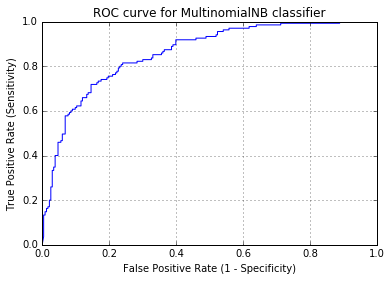

In [14]:
evaluate_vectorizers()

## Task 8 (Challenge)

The **policies_violated:confidence** column may be useful, since it essentially represents a measurement of the training data quality. Let's see whether we can improve the AUC by only training the model using the highest-quality rows!

To accomplish this, your first sub-task is to **calculate the mean confidence score for each row**, and then store those mean scores in a new column. For example, the confidence scores for the first row are `1.0\r\n0.6667\r\n0.6667`, so you should calculate a mean of `0.7778`. Here are the suggested steps:

1. Using the [`Series.str.split()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html) method, convert the **policies_violated:confidence** column into lists of one or more "confidence scores". Save the results as a new DataFrame column called **confidence_list**.
2. Define a function that calculates the mean of a list of numbers, and pass that function to the [`Series.apply()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) method of the **confidence_list** column. That will calculate the mean confidence score for each row. Save those scores in a new DataFrame column called **confidence_mean**.
    - **Hint:** This [code snippet](http://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html) may help you to understand the `Series.apply()` method.

In [15]:
confidence_column = mcd["policies_violated:confidence"].str.split("\n")
mcd.insert(len(mcd.columns), "confidence_list", confidence_column)
mcd.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude,review_city,confidence_list
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1,"I'm not a huge mcds lover, but I've been to be...","[1.0, 0.6667, 0.6667]"
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1,Terrible customer service. ŒæI came in at 9:30...,[1]


In [16]:
calc_mean = lambda x: sum([float(y) for y in x])/len(x)
mean_confidence_column = mcd.confidence_list.apply(calc_mean)
mcd.insert(len(mcd.columns), "confidence_mean", mean_confidence_column)
mcd.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude,review_city,confidence_list,confidence_mean
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1,"I'm not a huge mcds lover, but I've been to be...","[1.0, 0.6667, 0.6667]",0.7778
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1,Terrible customer service. ŒæI came in at 9:30...,[1],1.0000
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN,0,"First they ""lost"" my order, actually they gave...","[1.0, 1.0]",1.0000


Your second sub-task is to **create a new DataFrame with only the highest-quality rows**, meaning those with a mean score of 1, and then repeat the model building and evaluation process with the new DataFrame. Here are the suggested steps:

1. Create a new DataFrame that only includes the rows with a **confidence_mean** of 1. Compare the shapes of the original and new DataFrames.
2. Redefine X and y using the new DataFrame, and re-split X and y into training and testing sets.
3. Check to see whether this process increased or decreased the AUC of your **best model**.
4. Try **re-tuning** CountVectorizer to maximize the AUC, to see if this strategy was worthwhile.

In [17]:
print(mcd.shape)
mcd_hq = mcd[mcd.confidence_mean == 1]
print(mcd_hq.shape)

(1471, 15)
(785, 15)


In [18]:
X = mcd_hq.review
y = mcd_hq.rude

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(588,)
(197,)


MultinomialNB AUC: 0.8552 Features:  4894 params: {}
MultinomialNB AUC: 0.8408 Features:  4847 params: {'max_df': 0.2}
MultinomialNB AUC: 0.8555 Features:  4872 params: {'max_df': 0.3}
MultinomialNB AUC: 0.8572 Features:  4880 params: {'max_df': 0.4}
MultinomialNB AUC: 0.8557 Features:  4885 params: {'max_df': 0.5}
MultinomialNB AUC: 0.8546 Features:  4891 params: {'max_df': 0.6}
MultinomialNB AUC: 0.8585 Features:  2226 params: {'min_df': 2}
MultinomialNB AUC: 0.8746 Features:  1551 params: {'min_df': 3}
MultinomialNB AUC: 0.8716 Features:  1233 params: {'min_df': 4}
MultinomialNB AUC: 0.8512 Features:  1986 params: {'stop_words': 'english', 'min_df': 2}
MultinomialNB AUC: 0.8705 Features:  1328 params: {'stop_words': 'english', 'min_df': 3}
MultinomialNB AUC: 0.8715 Features:  1015 params: {'stop_words': 'english', 'min_df': 4}
MultinomialNB AUC: 0.8515 Features:  2204 params: {'max_df': 0.3, 'min_df': 2}
MultinomialNB AUC: 0.8697 Features:  1529 params: {'max_df': 0.3, 'min_df': 3}


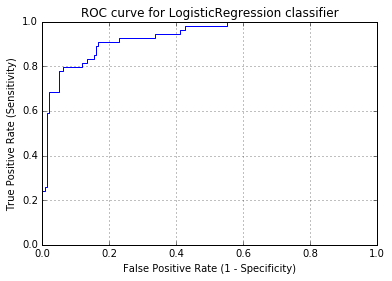

In [19]:
evaluate_vectorizers()

## Task 9 (Challenge)

New comments have been submitted to the McDonald's website, and you need to **score them with the likelihood** that they are referring to rude service.

1. Before making predictions on out-of-sample data, it is important to re-train your model on all relevant data using the tuning parameters and preprocessing steps that produced the best AUC above.
    - In other words, X should be defined using either **all rows** or **only those rows with a confidence_mean of 1**, whichever produced a better AUC above.
    - X should refer to either the **review column** or the **review_city column**, whichever produced a better AUC above.
    - CountVectorizer should be instantiated with the **tuning parameters** that produced the best AUC above.
    - **`train_test_split()`** should not be used during this process.
2. Build a document-term matrix (from X) called **X_dtm**, and examine its shape.
3. Read the new comments stored in **`mcdonalds_new.csv`** into a DataFrame called **new_comments**, and examine it.
4. If your model uses a **review_city** column, create that column in the new_comments DataFrame. (Otherwise, skip this step.)
5. Build a document_term matrix (from the **new_comments** DataFrame) called **new_dtm**, and examine its shape.
6. Train your best model (Naive Bayes or logistic regression) using **X_dtm** and **y**.
7. Predict the "rude probability" for each comment in **new_dtm**, and store the probabilities in an object called **new_pred_prob**.
8. Print the **full text** for each new comment alongside its **"rude probability"**. (You may need to [increase the max_colwidth](http://pandas.pydata.org/pandas-docs/stable/options.html) to see the full text.) Examine the results, and comment on how well you think the model performed!

In [20]:
X_train = mcd_hq.review
y_train = mcd_hq.rude

vect = CountVectorizer(ngram_range = (1, 2), min_df = 2, stop_words = 'english')

# create document-term matrix
X_dtm = vect.fit_transform(X_train)

In [21]:
# alternative: read file into Pandas using a relative path
path = '../data/mcdonalds_new.csv'
mcd_new_raw = pd.read_csv(path)
mcd_new_raw.head(2)

,city,review
0,Las Vegas,Went through the drive through and ordered a #...
1,Chicago,Phenomenal experience. Efficient and friendly ...


In [22]:
new_dtm = vect.transform(mcd_new_raw.review)
print(new_dtm.shape)

(10, 4407)


In [23]:
model = LogisticRegression()
model.fit(X_dtm, y_train)
new_pred_prob = model.predict_proba(new_dtm)

In [24]:
newdf = pd.DataFrame(data={'review': mcd_new_raw.review, 'rude_probability': new_pred_prob[:,1]})

In [25]:
pd.set_option('max_colwidth',8000)
newdf.head(10)

,review,rude_probability
0,"Went through the drive through and ordered a #10 (cripsy sweet chili chicken wrap) without fries- the lady couldn't understand that I did not want fries and charged me for them anyways. I got the wrong order- a chicken sandwich and a large fries- my boyfriend took it back inside to get the correct order. The gentleman that ordered the chicken sandwich was standing there as well and she took the bag from my bf- glanced at the insides and handed it to the man without even offering to replace. I mean with all the scares about viruses going around... ugh DISGUSTING SERVICE. Then when she gave him the correct order my wrap not only had the sweet chili sauce on it, but the nasty (just not my first choice) ranch dressing on it!!!! I mean seriously... how lazy can you get!!!! I worked at McDonalds in Texas when I was 17 for about 8 months and I guess I was spoiled with good management. This was absolutely ridiculous. I was beyond disappointed.",0.036505
1,"Phenomenal experience. Efficient and friendly staff. Clean restrooms, good, fast service and bilingual staff. One of the best restaurants in the chain.",0.249408
2,Ghetto lady helped me at the drive thru. Very rude and disrespectful to the co workers. Never coming back. Yuck!,0.629216
3,"Close to my workplace. It was well manged before. Now it's OK. The parking can be tight sometimes. Like all McDonald's, prices are getting expensive.",0.035478
4,"I've made at least 3 visits to this particular location just because it's right next to my office building.. and all my experience have been consistently bad. There are a few helpers taking your orders throughout the drive-thru route and they are the worst. They rush you in placing an order and gets impatient once the order gets a tad bit complicated. Don't even bother changing your mind oh NO! They will glare at you and snap at you if you want to change something. I understand its FAST food, but I want my order placed right. Not going back if I can help it.",0.075513
5,"Why did I revisited this McDonald's again. I needed to use the restroom facilities and the women's bathroom didn't have soap, the floor was wet, the bathroom stink, and the toilets were nasty. This McDonald's is very nasty.",0.026023
6,"This specific McDonald's is the bar I hold all other fast food joints to now. Been working in this area for 3 years now and gone to this location many times for drive-through pickup. Service is always fast, food comes out right, and the staff is extremely warm and polite.",0.294112
7,My friend and I stopped in to get a late night snack and we were refused service. The store claimed to be 24 hours and the manager was standing right there doing paper work but would not help us. The cashier was only concerned with doing things for the drive thru and said that the manager said he wasn't allowed to help us. We thought it was a joke at first but when realized it wasn't we said goodbye and they just let us leave. I work in a restaurant and this is by far the worst service I have ever seen. I know it was late and maybe they didn't want to be there but it was completely ridiculous. I think the manager should be fired.,0.989780
8,"Friendly people but completely unable to deliver what was ordered at the drive through. Out of my last 6 orders they got it right 3 times. Incidentally, the billing was always correct - they just could not read the order and deliver. Very frustrating!",0.043413
9,"Having visited many McDonald's over the years, I have to say that this one is the most efficient one ever! Even though it is still fast food, the service at the drive-thru is the best. They rarely make a mistake and I never see anyone parked in the drive-thru slots where they bring food out because they don't have it ready. So, if you like McDonald's fast food, it doesn't get any better than this.",0.039260


Since we only have 10 examples here, I will try to annotate them before looking at the rude_probability.

0 = Wrong order, filthy

1 = Good review

2 = Rude (the word is even used in the text)

3 = Small complaints (not directed towards people working there)

4 = Could be considered rude (impatient, rush people to order)

5 = Filthy

6 = Good review

7 = Could be considered rude (not taking order even though they should)

8 = Wrong order

9 = Good review


There are three reviews which could be considered rude (2, 4 and 7).

In my opinion review 2 should have had a much higher score than (0.62)
Detecting review 4 with 0.03 might be considered way to low.
Detecting review 7 with 0.99 could be considered ok.

Detecting rudeness is like detecting human emotion. Depending who is asked to annotate you can get large variations.
Regarding the question how well our model is doing:

Depending on what threshold has been set review 2 & 7 could have been detected as being rude. Review 4 would have been missed. To really evaluate if our model is good it would have helped to have more testing data. If MC Donalds only looks at reviews with rude_probability > 0.95 then the model would be bad since only one of three reviews would have been chosen.
